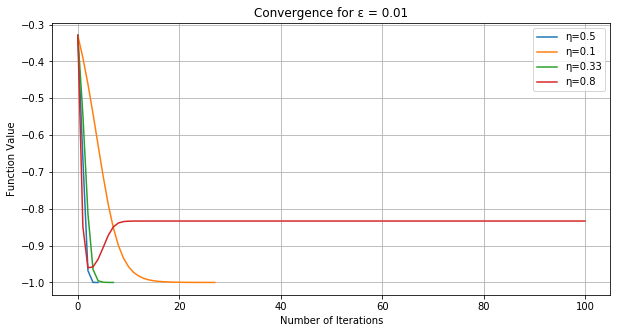

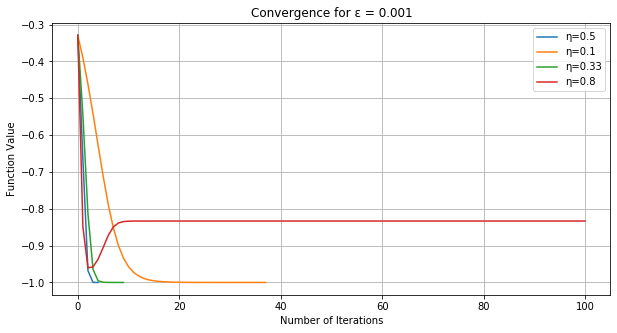

In [30]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt


def get_function_value_and_gradient(x):
    str1=str(x[0])
    str2=str(x[1])
    result = subprocess.run(["./getGradient.exe", "22888", str1, str2], stdout=subprocess.PIPE).stdout.decode("utf-8")
    output = result.strip().split(',')
    function_value=float(output[0])
    output[1]=output[1].replace("[" , ' ')
    output[2]=output[2].replace("]" , ' ')
    m=float(output[1])
    n=float(output[2])
    gradient = [m,n]  # Gradient of f(x, y)
    return function_value, gradient

x0 = np.array([0, 0])  # Initial point
epsilons = [0.01,0.001]  # Different ε values to test
etas = [0.5,0.1,0.33,0.8]
max_iterartions=100

for epsilon in epsilons:
    plt.figure(figsize=(10, 5))
    plt.title(f'Convergence for ε = {epsilon}')
    
    for eta in etas:
        x = x0
        function_values = []
        

        # Perform gradient descent iterations
        k = 0
        while True:
            # Call the black box function to get function value and gradient
            function_value, gradient = get_function_value_and_gradient(x)

            # Update x using gradient descent formula
            x_new = x - eta * np.array(gradient)
            #print (x_new)

           
            function_values.append(function_value)
            # Check the convergence condition
            
            if np.linalg.norm(gradient) <= epsilon:
                break
            if k==max_iterartions:
                break

            x = x_new
            k += 1

# Plot trajectories on the x-y plane for each combination
        plt.plot(range(len(function_values)), function_values, label=f'η={eta}')
       
# Customize the plot
    plt.xlabel('Number of Iterations')
    plt.ylabel('Function Value')
    plt.legend()
    plt.grid(True)

# Show the plot
    
    if(epsilon==0.01):
        plt.savefig("output1.jpg")
        plt.show()
    if(epsilon==0.001):
        plt.savefig("output2.jpg")
        plt.show()